# Exercises 08

## Exercise 08.1

This exercise consists of computing the expectation value of the energy of a quantum particle in one dimension, confined by $V(x) = x^4 - \frac{5}{2} x^2$, via a **Variational Monte Carlo** algorithm, this embeds the *Metropolis* algorithm in order to sample the transition probability, note that the *Metropolis* algorithm does not need any normalization constant, that would be required by the analytic calculus.
Indeed, the transition probability is $p = \min \left[1, \frac{|\Psi_T(x_{new})|^2}{|\Psi_T(x_{old}) |^2}\right]$, and normalization constants vanish in the fraction.

$$
\langle {\hat H} \rangle_T = \frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}{\int dx |\Psi_T(x)|^2} = \int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} E_{loc}(x)
$$

Where $E_{loc}$ is defined as $\frac{\hat{H} \Psi_T(x)}{\Psi_T(x)}$.

The test wave function is choosen as follows, due to the symmetry exhibited by the potential, and its shape similar to the harmonic potential:

$$
\Psi_T^{\sigma,\mu}(x) = N \left[ e^{-\frac{(x-\mu)^2}{2\sigma^2}} + e^{-\frac{(x+\mu)^2}{2\sigma^2}} \right]
$$

Here follows the result obtained using the following fixed parameters:
* $\mu = $ 1.
* $\sigma = $ 0.7
* $dx = $ 2.7 (giving an approximate acceptance rate of $\sim$ 0.5)

Notes: the code runs for 100 blocks, each of 10000 attempted steps.

It follows the analytic calculation for the normalization constant, even if it is not necessary, it could have been useful to plot test function instead of filling an histogram in **Exercise 09.2**:

$$
N = \left(2 \sigma \sqrt{\pi} \cdot \left(1 + e ^ {-\frac{\mu^2}{\sigma^2}} \right) \right) ^ {-\frac{1}{2}}
$$

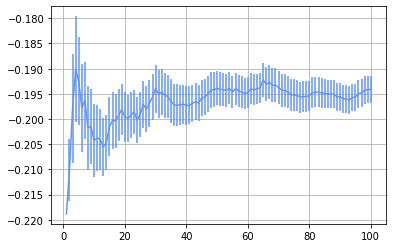

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Data loading
x = np.loadtxt("./dataEx1/output_energy_best.dat", usecols = 0)
energy = np.loadtxt("./dataEx1/output_energy_best.dat", usecols = 1)
err_energy = np.loadtxt("./dataEx1/output_energy_best.dat", usecols = 2)
# Plot
plt.errorbar(x, energy, yerr = err_energy, color="cornflowerblue")
plt.grid()
plt.show()

## Exercise 08.2

The exercise consists of finding the best parameters $\mu$ and $\sigma$ to minimize $\langle \hat{H} \rangle_T$ that characterize the Ground State of the system exposed above, using the **Simulated annealing** algorithm. The algorithm exploits the Boltzmann weight to compute the transition probability, obviously the Boltzmann weight needs a temperature to be computed, this parameter needs to be fixed a priori and does not represent any physical quantity.

#### Temperature
The simulation (**SA**) is performed with 25 different temperatures $( T = a \cdot 10^{-l}$, where $a \in$ $\{10, 8, 6, 4, 2\}$ and $l \in \{0, 1, 2, 3, 4\} )$.
At each order of magnitude of temperatures $(l = 0, 1, 2, 3, 4)$ I choose a different amount of steps to be tested, indeed, the acceptance rate decreases with the decrease of the temperature, so more steps need to be subjected to *Metropolis* algorithm: $N = 500 \cdot (l + 1)$, $l \in \{0, 1, 2, 3\}$ except for the last temperature, which was characterized by 3000 steps, where $N$ is the number of steps that are taken at every order of magnitude.
It is important to notice that after 21/22 **SA** steps the parameters do not vary anymore, so the code could be killed in order to save some time.

#### Parameters
Here follows the starting parameters and the Variational Monte Carlo steps:
* $\mu =$ 1.
* $\sigma =$ 0.7
* $dx =$ 2.7
* $d\mu =$ 0.4
* $d\sigma =$ 0.3

#### Data blocking
In order to estimate the energy and write it down on file, it has to be precisely calculated using the Variational Monte Carlo algorithm exposed in **Exercise 09.1** and reported with the correct uncertainty, computed using data blocking. This are the parameters used in the code:
* Number of blocks = 20
* Number of steps per block = 5000

### 08.2.1

The plot below shows the trend of the energy of the ground state computed, via the **Variational Monte Carlo** method, using the parameters obtained at the end of the **SA** step, the orange scatter plot represents the simulation temperature per **SA** step.

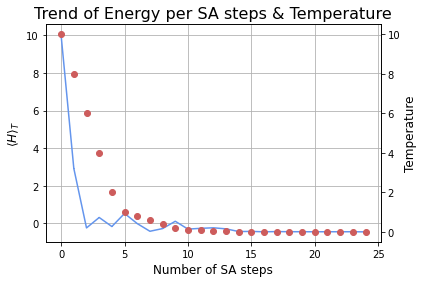

In [2]:
import numpy as np
import matplotlib.pyplot as plt

nsteps = 25
# data loading
steps = np.loadtxt("./dataEx2/output_energy.dat", usecols = 0)
temp = np.loadtxt("./dataEx2/output_energy.dat", usecols = 1)
energy = np.loadtxt("./dataEx2/output_energy.dat", usecols = 2)
err_energy = np.loadtxt("./dataEx2/output_energy.dat", usecols = 3)

# print(temp)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# plot settings
ax1.errorbar(steps, energy, yerr = err_energy, color="cornflowerblue")
ax2.scatter(steps, temp, color = "indianred")
plt.title("Trend of Energy per SA steps & Temperature", fontsize=16)
ax1.set_xlabel("Number of SA steps", fontsize=12)
ax1.set_ylabel(r"$\langle H \rangle _T$", fontsize=12)
ax2.set_ylabel("Temperature", fontsize=12)
ax1.grid()
plt.show()

### 08.2.2

The plot below shows how the parameters of the test wave function ($\mu$ and $\sigma$) variate for each **SA** step (they are labelled with the step number). The chart shows a strong convergence after the forteenth step, corresponding to temperature $T =$ 0.02, this result is not general at all, but gives some information about the expected step of convergence.

Mu = 0.813436
Sigma = 0.619152


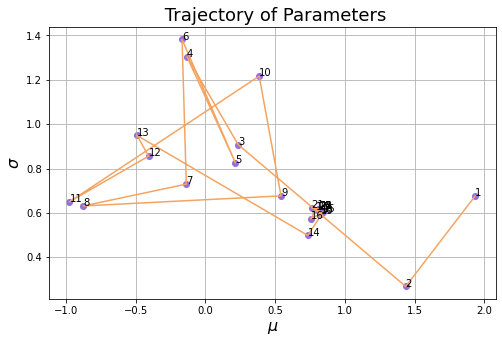

In [3]:
mu = np.loadtxt("./dataEx2/output_mu.dat", usecols = 2)
sigma = np.loadtxt("./dataEx2/output_sigma.dat", usecols = 2)

print("Mu =", mu[nsteps-1])
print("Sigma =", sigma[nsteps-1])

fig = plt.figure(1, figsize=[8,5])

for i in range(nsteps):
    plt.text(mu[i], sigma[i], str(i+1))
plt.scatter(mu, sigma, color="mediumpurple")
plt.plot(mu, sigma, color="sandybrown")
plt.title(" Trajectory of Parameters", fontsize=18)
plt.xlabel(r"$\mu$", fontsize=16)
plt.ylabel(r"$\sigma$", fontsize=16)
plt.grid()
plt.show()

### 08.2.3

This part of the exercise is dedicated to a more precise calculation of the energy of the ground state of the particle, using the parameters obtained via the **SA** algorithm, the parameters are the ones exposed in the output of the code above: $\mu =$ -0.798767 and $\sigma =$ 0.616195. The code is the same as **Exercise 08.1**, so there are 100 blocks of 10000 steps each.

Ground state energy (Simulated Annealing): -0.4427 +/- 0.0008


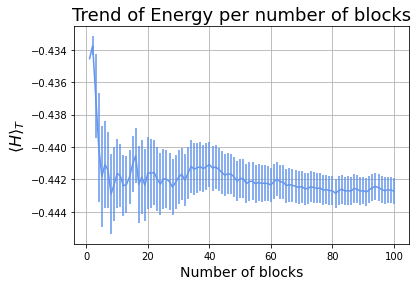

In [4]:
# ex1 code running w/ mu = 0.813436 and sigma = 0.619152
steps = np.loadtxt("./dataEx2/output_energy_best.dat", usecols = 0)
energy_best = np.loadtxt("./dataEx2/output_energy_best.dat", usecols = 1)
err_energy_best = np.loadtxt("./dataEx2/output_energy_best.dat", usecols = 2)

print("Ground state energy (Simulated Annealing):", round(energy_best[99], 4), "+/-", round(err_energy_best[99], 4))

plt.errorbar(steps, energy_best, yerr = err_energy_best, color="cornflowerblue")
plt.title("Trend of Energy per number of blocks", fontsize=18)
plt.xlabel("Number of blocks", fontsize=14)
plt.ylabel(r"$ \langle H \rangle_T$", fontsize=16)
plt.grid()
plt.show()

### 08.2.4

Using the Python code provided to solve the matrix problem associated with this physical state, I could estimate the true energy of the ground state of the quantum particle, it is given in the output of the second cell below. Then, I wrote the result obtained via the **SA** algorithm, they differ for a significant value, that it's certainly due to the fact that the test wave function does not have the correct form of the eigenfunction associated to this potential. The result could be better if some higher order terms would have been included in the test wave function, and then, obviously in the analytic calculation of the Local Energy term (2nd derivative of the test function).

The eigenfunction obtained by solving the matrix problem has been plotted and compared to an histogram filled using the *Metropolis* algorithm: sampling points with this method is the key of the **Variational Monte Carlo** method to compute expectation value and quantum integrals. $10^6$ points have been sampled using the same transition probability and parameters of **Exercise 09.1**, they have been printed onto a file and exposed in the histogram below.

In order to have bigger error bars I chose to make a histogram with a large number of bins (100), $x$ can only live in $(-3, 3)$, because the wave function outside can be neglected. Considering the problem as a count problem, it can be assumed the Poisson's treatment, and consider the uncertainties per bin as the square root of the number of elements in each bin.

Using such a large number of bins, I can conclude that the results obtained via the **Simulated annealing** method are in good agreement with the result obtained numerically solving the matrix problem.

In [5]:
# potential
def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

# code parameters
hbar = 1
m = 1
a = 10
N = 1000
# step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0]
V = Vpot(x)
CDiff = np.diag(np.ones(N-1), -1) - 2 * np.diag(np.ones(N), 0) + np.diag(np.ones(N-1), 1)
# hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)
# compute eigenvectors and their eigenvalues
E, psi = np.linalg.eigh(H)
# take the transpose & normalize
psi = np.transpose(psi)
psi = psi / np.sqrt(dx)

Ground state energy: -0.46
Ground state energy (Simulated Annealing): -0.4427 +/- 0.0008


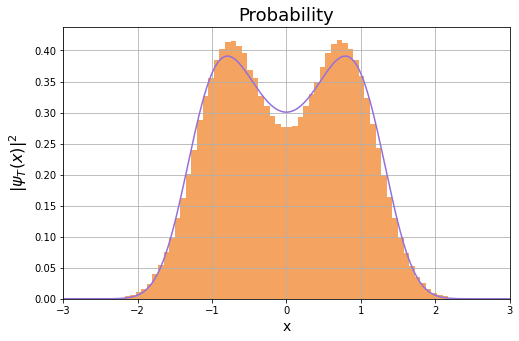

In [8]:
# data loading
data = np.loadtxt("./dataEx2/output_hist.dat")
nbins = 80

print("Ground state energy:", round(E[0], 3))
print("Ground state energy (Simulated Annealing):", round(energy_best[99], 4), "+/-", round(err_energy_best[99], 4))

plt.figure(figsize=[8, 5])
# histogram filled with the Metropolis sampling
n, bins, patches = plt.hist(data, bins = nbins, range=(-3, 3), color="sandybrown", density=True)
plt.plot(x, psi[0]**2, color="mediumpurple")
plt.title("Probability", fontsize=18)
plt.xlabel("x", fontsize=14)
plt.ylabel(r"$|\psi_T(x)|^2$", fontsize=16)
plt.xlim((-3., 3.))
plt.grid()
plt.show()